In [12]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import *
from tqdm import tqdm
from numba import njit
import pandas as pd

plt.rcParams["figure.figsize"] = [14, 8]
plt.rcParams["figure.dpi"] = 100
plt.set_cmap("binary_r")

<Figure size 1400x800 with 0 Axes>

In [95]:
def read_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    return lines

def find_index(lst):
    return int(lst[-2])

def find_name(lst):
    return lst[-1]

def find_edges(lst):
    # Split each string in the list by whitespace, convert to integers, and store in a new list
    processed_lst = [list(map(int, item.strip().split())) for item in lst]
    return np.array(processed_lst)

yeast = read_file('LAB3-data/YeastS.net') # list of strings, 2361 vertices
yeast = yeast[12:]
N_vertices = 2361 

vertices = np.array([find_index(yeast[i].split(" ")) for i in range(N_vertices)]) # equivalent to np.arange(1, 2361+1)
names = [find_name(yeast[i].split(" ")) for i in range(N_vertices)] 
names = [name[1:-2] for i, name in enumerate(names)] # Names of the vertices ['YBR236C', 'YOR151C', 'YML010W', ...]

edges = find_edges(yeast[N_vertices+1:]) - 1 # egdes of the graph, subtracting 1 so the indices starts with 0

"""
I assume that the edges represent some sort of bidirectional relation between different kind of yeast, 
the graph should therefore be undirected. To compensate this, I add additional edges to the graph to make it 'undirected'.
It wont affect the visualization.
"""
edges = np.concatenate([edges, edges[:,::-1]], axis=0)
N_edges = len(edges)

@njit
def construct_adj_matrix(
    edges, 
    A = np.zeros([N_edges, N_edges], dtype=int)):
    
    col1, col2 = edges.T
    for i in col1:
        for j in col2:
            A[i,j] = 1          
    return A

# Constructing the adjacency matrix
adj_matrix = construct_adj_matrix(edges)

# Visualizing the graph

One way to do this is to check the adjacency matrix. It looks like only the first 2361 vertices are relevant.

2361.0


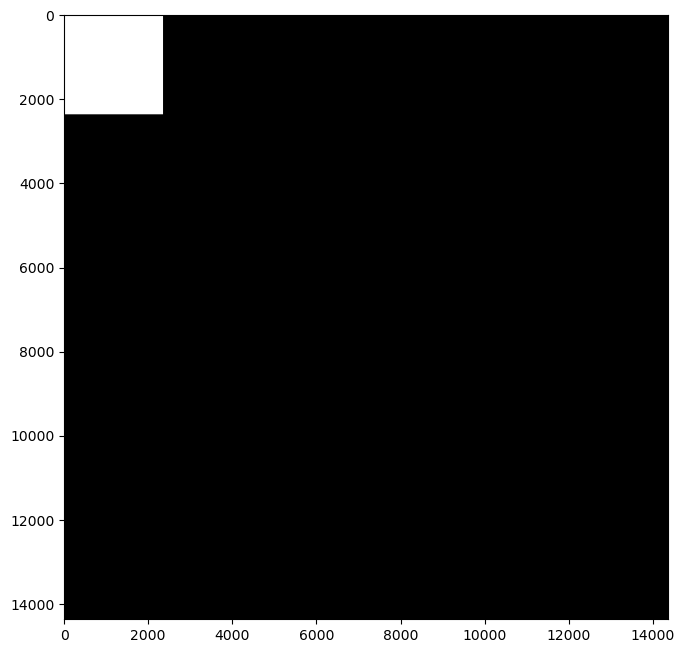

In [89]:
plt.imshow(adj_matrix)
print(np.sqrt(np.count_nonzero(adj_matrix))) 

For visualization porpurses, I will only look at the first N cases. For N = 200, there seems to be around 14 clusters.

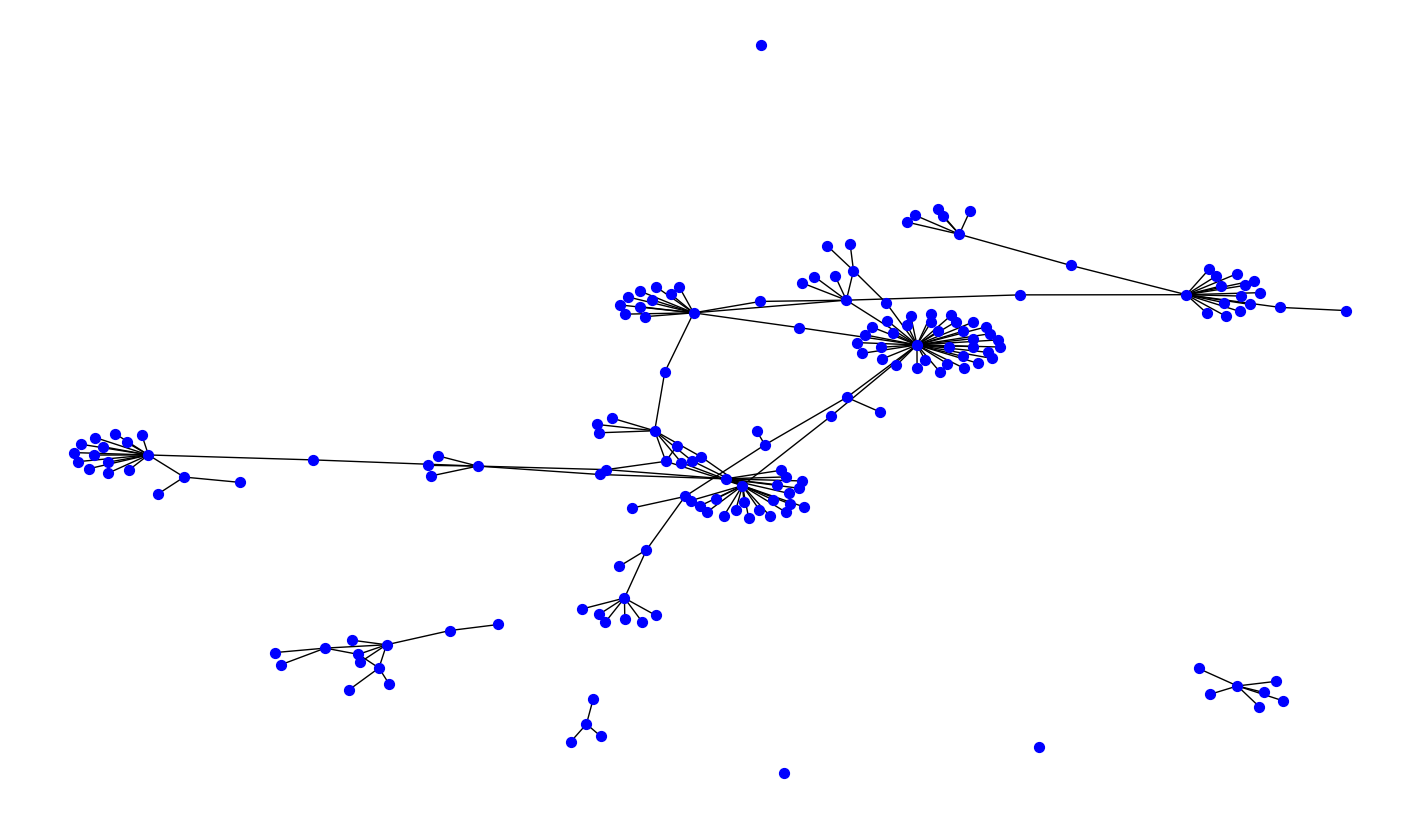

In [104]:
N = 200
edges_subset = edges[:N]
names_subset = names[:N]

G = nx.Graph()
for edge in edges_subset:
    G.add_edge(edge[0], edge[1])

unique_nodes = np.unique(edges_subset)
name_mapping = dict(zip(unique_nodes, names[:len(unique_nodes)]))

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50, node_color="blue", font_weight='bold')
# nx.draw_networkx_labels(G, pos, labels=name_mapping, font_size=8) # optional labels of the vertices (messy if N > 100)
plt.show()

# Computing the modularity of the subgraph (N=200)
The formula for computing the modularity $Q$ that I will use is given by 
$$Q = \sum_{A\in \mathcal{A}} \frac{e(A)}{m} - \frac{v^2}{4m^2}$$

In [ ]:
Q = ∑[ (e_c / m) - (v_c^2 / (4 * m^2)) ].